# K-means & PCA

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('D:\College\Design of Programming Language(ML)\ML6\Wholesale customers data.csv')

In [18]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Pre Processing

In [19]:
def check(data):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,Channel,int64,2,0
1,Region,int64,3,0
2,Fresh,int64,433,0
3,Milk,int64,421,0
4,Grocery,int64,430,0
5,Frozen,int64,426,0
6,Detergents_Paper,int64,417,0
7,Delicassen,int64,403,0


In [20]:
categorical_columns = ['Channel', 'Region']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [21]:
# Step 2: Normalize numerical features
scaler = StandardScaler()
numerical_features = data_encoded.columns
data_normalized = scaler.fit_transform(data_encoded)

## Modelin

In [22]:
# Step 3: Apply K-means clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

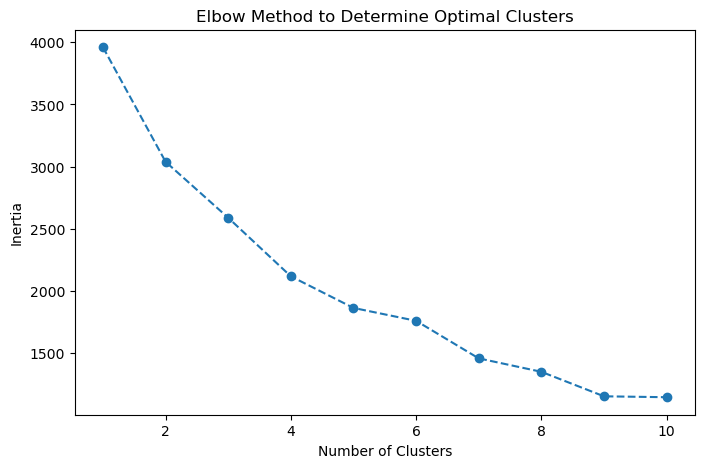

In [23]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [24]:
# Step 4: Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_normalized)
    score = silhouette_score(data_normalized, labels)
    silhouette_scores.append(score)

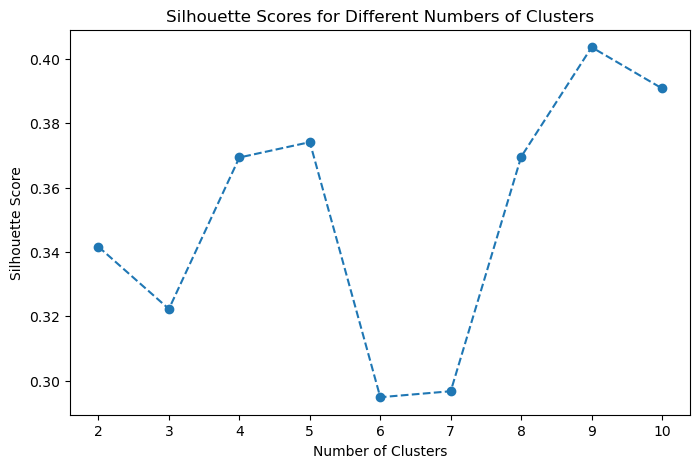

In [25]:
# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [26]:
# Step 5: Select optimal clusters (manually or programmatically based on the above plots)
optimal_clusters = 3  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_normalized)

In [27]:
# Step 6: PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

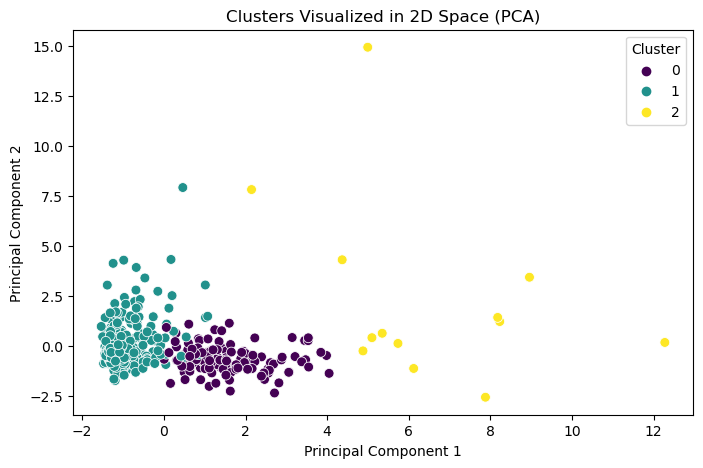

In [28]:
# Plot clusters in 2D space
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels, palette='viridis', s=50)
plt.title("Clusters Visualized in 2D Space (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()